In [1]:
import datetime as dt
import os, sys
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
from dateutil.relativedelta import relativedelta
from matplotlib import rcParams



import numpy as np
import datetime as dtm
import dateutil.parser as dparser
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cmocean

# from mpl_toolkits.basemap import Basemap (rotate, ben's suggestion)



from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')
rcParams.update({'figure.autolayout': True})

In [2]:
test = True

filesdir = "/ocean/gsgarbi/selected_days/"

dirs = os.listdir(filesdir)



#Iona = (-123.30898284912109, 49.187351226806641)
Iona = (-123.30807, 49.19026) #value from first point in traj.txt (Ariane output)

S15 = (-123.3114, 49.130412)
S16 = (-123.317415, 49.1214)
xl=(-126.2,-122.2)
yl=(47.1,51)

cmap_p = mpl.cm.get_cmap('Oranges')
cmap_w = cmocean.cm.dense_r

In [3]:
def param(timef): #background
    
    size = 5
    ms = 5/2
    S15 = (-123.3114, 49.130412)
    S16 = (-123.317415, 49.1214) 
    bathy = nc.Dataset("/ocean/gsgarbi/bathy_meter_SalishSea2.nc")
    model_lats = bathy.variables['nav_lat'][:]
    model_lons = bathy.variables['nav_lon'][:]
    depth = bathy.variables['Bathymetry'][:]        
    #End of spit
    late = 49.205
    lone = -123.26
    #Further up spit
    lats = 49.214
    lons = -123.22
        
    dx = 1.2
    lat = late + dx * (late - lats)
    lon = lone + dx * (lone - lons)
    y, x = geo_tools.find_closest_model_point(lon, lat, model_lons, model_lats)

    outy = y - 1
    outx = x - 1
    
    deep = 110
    shallow = 35
    
    time_0 = 0
    
    time_f = 2
    
    new_limx = (-124.5,-122.5)
    
    new_limy = (48.7,49.5)

    
    new_ticksx = (new_limx[0], float(sum(new_limx))/2, new_limx[1])
    
    new_ticksy = (new_limy[0], float(sum(new_limy))/2, new_limy[1])
                       
    
    Iona =(model_lons[outy, outx], model_lats[outy, outx])
    
        
    global fig, axs
    
    fig, axs = plt.subplots(LIN,COL, figsize = (6,3.2))

    
    if LIN == 1 or COL == 1:
        
        axs=np.reshape(axs,(1,1))
    
    
    
    for j in range(LIN):
        for k in range (COL):
            
            divider = make_axes_locatable(axs[j,k])
            

            
            cax_w = divider.append_axes("right", size="5%", pad=0.05)
            

            cb_w = mpl.colorbar.ColorbarBase(cax_w, 
                                             cmap = mpl.cm.get_cmap(cmap_w),
                                             norm = mpl.colors.Normalize(vmin=shallow, 
                                                                         vmax=deep),
                                             orientation='vertical')


            cb_w.set_label("Water depth (m)")
            

            mesh_w = axs[j,k].pcolormesh(
                                          model_lons, 
                                          model_lats, 
                                          depth, 
                                          cmap = cmap_w
                                        )

            axs[j,k].set_xlim(new_limx)
            axs[j,k].set_xticks(new_ticksx)
            axs[j,k].set_xticklabels(('%s W' %-new_limx[0], 
                                      '%s W' %-round(float(sum(new_limx))/2,2), 
                                      '%s W' %-new_limx[1]))
            axs[j,k].set_xlabel('Longitude')
            
            axs[j,k].set_ylim(new_limy)
            axs[j,k].set_yticks(new_ticksy)
            axs[j,k].set_yticklabels(('%s N' %new_limy[0], 
                                      '%s N' %round(float(sum(new_limy))/2,1), 
                                      '%s N' %new_limy[1]))
            axs[j,k].set_ylabel('Latitude')
            
            
            #Iona
            axs[j,k].plot(Iona[0], Iona[1], 'wo', ms = ms)
            #New Stations
    
            axs[j,k].plot(S15[0],S15[1], 'wo', ms = ms)
            
            axs[j,k].plot(S16[0],S16[1], 'wo', ms = ms)
            
            axs[j,k].annotate(
            "Iona outfall",
            xy=(model_lons[outy, outx], model_lats[outy, outx]), xytext=(50, 10),
            textcoords='offset points', ha='left', va='bottom',
            #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
            
            axs[j,k].annotate(
            "Station 15",
            xy=(S15[0],S15[1]), xytext=(50, 10),
            textcoords='offset points', ha='left', va='bottom',
            #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
            axs[j,k].annotate(
            "Station 16",
            xy=(S16[0],S16[1]), xytext=(50, 10),
            textcoords='offset points', ha='left', va='top',
            #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
    plt.tight_layout()

    return axs

# In[31]:|

    


In [4]:
# #72 particulas por dia e 72 pontos por dia por trajetoria

RAWDIR = "/ocean/gsgarbi/ariane_raw/2016+jan2017/"
    
OUTPUTDIR = "/ocean/gsgarbi/selected_days/"

H = 24

pph = 3

ppd = H * pph #(also number of outputs per trajectory per day since we have 3 outputs per hour)


In [5]:
def find_direct (RAWDIR, date, traj_len):
    init_date = date - dt.timedelta(days = traj_len)
    y = str(init_date.year)
    m = str(init_date.month)
    n = str(date.month)
    w = str(date.year)
    


    if len (m) == 1:
        m = "0"+str(m)
        
    if len (n) == 1:
        n = "0"+str(n)
    
    direct = [i for i in os.listdir(RAWDIR) if y+m == i[:6] or w+n == i[:6] ]
    
    print ("got directory")
    
    return direct
    


In [6]:
def get_points(direct, date, traj_len, phase = 0):
    '''
    get 72 trajs (3 per hour) starting on date.day with fixed traj len
    '''
    init_date = date
    
    phase = phase * 3
    pts = []

    d = init_date.day
    #select the particles
    parts = range (1 + ppd*(d - 1) + phase, 1 + ppd*(d - 1) + phase + 72)
    part = parts[0]

    
    for directory in direct:


        with open(RAWDIR + directory + "/traj.txt") as file:



            count = 0
            traj = []


            for i, line in enumerate(file):  
                line = line.strip('\n').split()
                line = [float(k) for k in line]


                if line[0] == part:

                    traj.append(line)
                    count +=1
                if count == traj_len * ppd:

                    pts.append(traj)
                    traj = [] #reset traj
                    count = 0 #reset counter
                    part += 1 #go to the next particle
                    #traj_len -= int(i/3) * 3 #next length will be smaller
                if part == parts[-1]+1:
                    break
            else:
                    print ("month transition -> open next file")


                    parts = range (1, parts[-1] - part)
                    part = parts[0]

                




    return pts
    
   

In [7]:
LIN = 1
COL = 1                                                                        

                 

                                                       


In [8]:
# test_version = True

# if test_version:
#     print ("test")

# traj_len = 3
# phase = 23


# times = np.array(
#     [
#     dt.datetime(2016, 7, 19),
#     dt.datetime(2016, 7, 26),
#     dt.datetime(2016, 8, 2),
#     dt.datetime(2016, 8, 9),
#     dt.datetime(2016, 8, 16),
#     dt.datetime(2016, 8, 23),
#     ]
#                             )

# init_depths = [45,59,77]

# fl = ['a','b','c']

# test = times_day_before = np.array(
#     [
#     dt.datetime(2016, 8, 2),
#     dt.datetime(2016, 8, 9),
#     ]
#                             )


# for date in times:
    
#     print (date)



#     direct = find_direct(RAWDIR, date, traj_len)
#     print ("direct: ", direct)



#     pts = get_points(direct, date, traj_len, phase)




#     init_date = date - dt.timedelta(days = traj_len)

#     for i_0 in range(len(init_depths)):
        

        
#         END = len(pts[i_0::3][0])
        


#         axs = param(traj_len)
        
#         T = 0
        
#         print ("num of trajectories: ", len(pts[i_0::3]))

#         for num, part in enumerate(pts[i_0::3]):
            
            

            
            
# #            part = part[:-(num*3 +1)] #cut the end of traj

#             end = len(part)
            




#             for t in range (end):

                

#                 scaled_t = 1-(END - (t + T) ) / END
#                 cmap = cmap_p
#                 color = cmap(scaled_t)
#                 axs[0,0].scatter(part[t][1], part[t][2], 
#                                  color = color, marker='o',s=.05)
#                 fdate1 = date.strftime('%m/%d/%Y')
#                 fdate2 = date.strftime('%m_%d_%Y')
                
#                 axs[0,0].set_title("{}) {} - Initial depth: {} m".format(fl[i_0],
#                                                                      fdate1,
                                                                   
#                                        init_depths[i_0]),
                                   
#                                        fontsize = 12) 
            
#             T += 3


                                                        

#         dirs = "/ocean/gsgarbi/MEOPAR/private-docs/reports" + "/IonaProject/ionafigs/cs_{}_{}d_{}.png".format(fdate2, 
#                                                              traj_len, 
#                                                              init_depths[i_0])
        
        
        
#         if test_version:
            
#             dirs = dirs [:-4] + "_test" + dirs [-4:]  

            
#         plt.savefig(fig.savefig(dirs, dpi = 400 ) )
        
#         print ("saved in: ", dirs)
                                                        
#         plt.tight_layout()
#         plt.show()
    
    


# #         viz_tools.set_aspect(axs[0,0])
    







In [9]:
# fig, axs = plt.subplots(1,1, figsize = (5,1))

# # divider = make_axes_locatable(axs[1,0])


# # cax_p = divider.append_axes("bottom", size="5%", pad=0.5)
# cb_p = mpl.colorbar.ColorbarBase(axs, 
#                                 cmap = cmap_p,
#                                 norm = mpl.colors.Normalize(vmin=0, 
#                                                             vmax=traj_len*24), 

#                                 orientation='horizontal')
# cb_p.set_label("Time (hours)")


# plt.tight_layout()
# plt.savefig("/ocean/gsgarbi/MEOPAR/private-docs/reports/IonaProject/ionafigs/cbar.png",
#            transparent = True, dpi = 400)

# plt.show()

In [10]:
def close(p, q = S15, distance = 0.5):
    d = geo_tools.haversine (p[0],p[1], q[0], q[1])
 #   print ("The distance is {}".format(d))
    if d.all() < distance:

        return True
    else:

        return False
    
def dist(p, q = S15):
    d = geo_tools.haversine (p[1],p[2], q[0], q[1])
    return d

def min_dist_traj(traj, q = S15):
    ds = [geo_tools.haversine (p[1],p[2], q[0], q[1]) for p in traj]
    return min (ds)

In [11]:
pts = []

traj_len = 7

times = np.array(
    [
    dt.datetime(2016, 7, 19),
    dt.datetime(2016, 7, 26),
    dt.datetime(2016, 8, 2),
    dt.datetime(2016, 8, 9),
    dt.datetime(2016, 8, 16),
    dt.datetime(2016, 8, 23),
    ]
                            )
north = [dt.datetime(2016, 7, 26), dt.datetime(2016, 8, 23)]


test = np.array(
    [
    dt.datetime(2016, 7, 19),
    dt.datetime(2016, 7, 26)
    ]
)



for date in times:
    
    direct = find_direct(RAWDIR, date, traj_len)
    
    pts.append(get_points(direct, date, traj_len, phase = 0))

got directory
got directory
got directory
got directory
got directory
got directory


In [12]:
full_period = [k for sublist in pts for k in sublist]

In [34]:
close_parts = []
c_p_w_dist = []
results = []

D = 1.2

for traj in full_period:
    traj_analysis(traj)

In [14]:
for i in c_p_w_dist:
    print (i[1])

43.666666666666664
17.333333333333332
18.0
90.66666666666667
18.666666666666668
14.666666666666666
15.666666666666666
14.666666666666666
13.333333333333334
15.666666666666666
16.333333333333332
32.666666666666664
33.333333333333336
27.0
60.333333333333336
41.333333333333336
108.33333333333333
31.0
53.0
95.33333333333333
120.33333333333333
90.0
42.666666666666664
76.33333333333333


<b> 72 particles released on each of the following days:     [
    dt.datetime(2016, 7, 19),
    dt.datetime(2016, 7, 26),
    dt.datetime(2016, 8, 2),
    dt.datetime(2016, 8, 9),
    dt.datetime(2016, 8, 16),
    dt.datetime(2016, 8, 23),
    ]</b>

/ocean/gsgarbi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


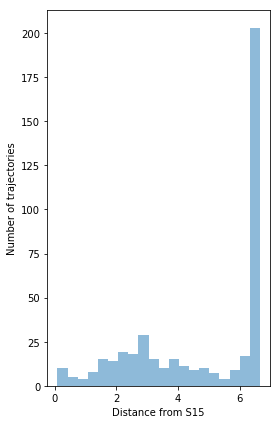

In [15]:
min_ds = []
for traj in full_period:
    min_ds.append(min_dist_traj(traj))

fig,ax=plt.subplots(1,1,figsize=(4,6))
bin_num = 20

ax.hist(min_ds, bin_num, alpha=0.5)
ax.set_xlabel("Distance from S15")
ax.set_ylabel("Number of trajectories")

<b> For particles that move north from the start of their trajectories, their min distance from S15 and S16 will be respectively in km: <b>

In [16]:
geo_tools.haversine(Iona[0], Iona[1], S15[0], S15[1])

6.6550168679961761

In [17]:
geo_tools.haversine(Iona[0], Iona[1], S16[0], S16[1])

7.6821555732069138

<b>This allows us to limit the hostogram range to (0,6)

6.655016868


/ocean/gsgarbi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


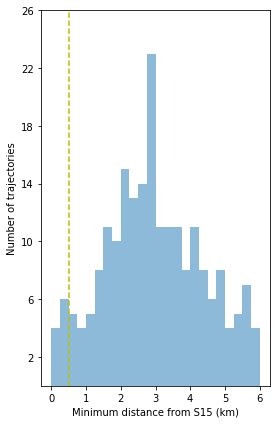

In [18]:
min_ds = []
for traj in full_period:
    min_ds.append(min_dist_traj(traj))

fig,ax=plt.subplots(1,1,figsize=(4,6))
bin_num = 24

ax.hist(min_ds, bin_num, alpha=0.5, range = (0,6))
ax.set_xlabel("Minimum distance from S15 (km)")
ax.set_ylabel("Number of trajectories")



ax.set_ylim(0, 26)

ax.set_yticks([k for k in range(2,28, 4)])
ax.set_xticks([k for k in range(0, 7)])

ax.plot([0.5, 0.5], [0,28], 'y--')

print (max(min_ds))

/ocean/gsgarbi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


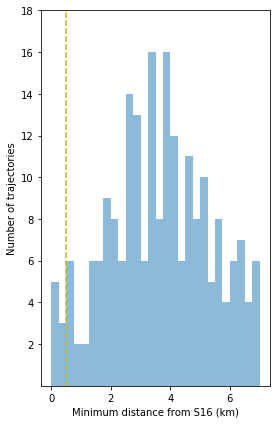

In [19]:
min_ds = []
for traj in full_period:
    min_ds.append(min_dist_traj(traj, q = S16))


fig,ax=plt.subplots(1,1,figsize=(4,6))
bin_num = 28

ax.hist(min_ds, bin_num, alpha=0.5, range = (0, 7))
ax.set_xlabel("Minimum distance from S16 (km)")
ax.set_ylabel("Number of trajectories")
ax.set_yticks([k for k in range(2,24, 2)])

ax.set_ylim(0, 18)

ax.plot([0.5, 0.5], [0,24], 'y--')

the age at which the particles are in the (0,500) m range. first point that crosses within the radius => age

In [20]:
geo_tools.haversine(S15[0], S15[1], S16[0], S16[1])

1.0928175670067095

In [21]:
df = [k [1] for k in c_p_w_dist ]

/ocean/gsgarbi/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


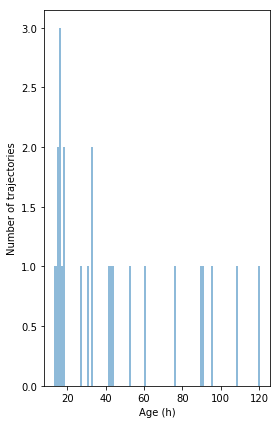

In [22]:
fig,ax=plt.subplots(1,1,figsize=(4,6))
bin_num = 8*12

ax.hist(df, bin_num, alpha=0.5)
ax.set_xlabel("Age (h)")
ax.set_ylabel("Number of trajectories")


output : time series w start date. out 1: boolean if in the region within time T and distance D (arguments + traj). output2: the age it first enters the region (0 it doesnt). then run for a few days. then run for june, august, july, sept. plot a time series with 0 and 1 from output 1.

discussion: correlations between those things (0 and 1 times series, winds and *tides*)

In [35]:
def traj_analysis (traj, time = 24, distance = 1.2):
    
    check = 0
    
    age = 0
    
    for pt in traj:


        if (dist(pt, S15) < distance or dist(pt, S16) < distance) and traj.index(pt)/3 < time:
            check = 1
            age = traj.index(pt)/3 < time
            print ("ok")
            break
    return (check, age)
            